In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

<h3>Homework</h3>

<ul>
    <li>Download the dataset and format it as a pandas DataFrame.
    <li>Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
        <ul>
    <li>Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
    <li>Find out the medals awarded in 2016 for each sport.
    <li>List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
     <li>Generate a bar plot of record counts corresponding to each of the top five sports.
    </ul>
    <li>Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
    <ul>
    <li>Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
    </ul>
        <li>Find out which national teams won the largest number of medals in the top five sports in 2016.
    <ul>
    <li>Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
        </li>
        </ul>
    <li>Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.
    <ul>
        <li>Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

### 1.Download the dataset and format it as a pandas DataFrame

In [38]:
df = pd.read_csv('athlete_events.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### 2.Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.

Filter the DataFrame to only include the rows corresponding to medal winners from 2016.

In [40]:
medal_athlete = df.dropna(subset=['Medal'])
medal_athlete_2016 = medal_athlete[medal_athlete['Year'] == 2016]
print("From ",df[df['Year'] == 2016].shape[0],"athletes around the world there were only",medal_athlete_2016.shape[0],"that won the medal")


From  13688 athletes around the world there were only 2023 that won the medal


Generate a bar plot of record counts corresponding to each of the top five sports

Text(0.5, 1.0, 'Top 5 medals awarded sport in 2016')

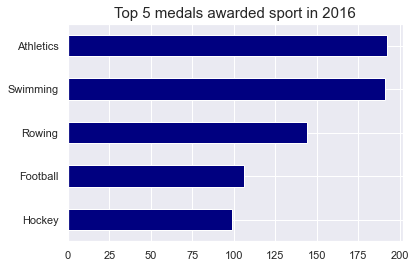

In [41]:
medal_athlete_2016['Sport'].value_counts(ascending=True).tail(5).to_frame().plot(kind='barh',legend=None,color='Navy')
plt.title('Top 5 medals awarded sport in 2016',fontsize=15,)

### 3.Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.

In [42]:
medal_athlete_2016['Sport'].value_counts().head(5).index

Index(['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey'], dtype='object')

In [43]:
top_5_sport_2016 = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
top5_sport_medal_2016 = medal_athlete_2016[medal_athlete_2016['Sport'].isin(top_5_sport_2016)]

Text(0.5, 1.0, "Distribution of top 5 sport winners' age")

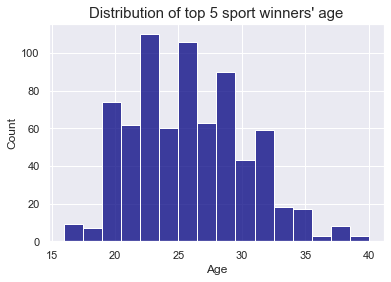

In [44]:
sns.histplot(top5_sport_medal_2016['Age'],color='Navy')
plt.title("Distribution of top 5 sport winners' age",fontsize=15)

### 4.Find out which national teams won the largest number of medals in the top five sports in 2016

Text(-0.5, 140, 'Medals won my each country in the top five sports (2016)')

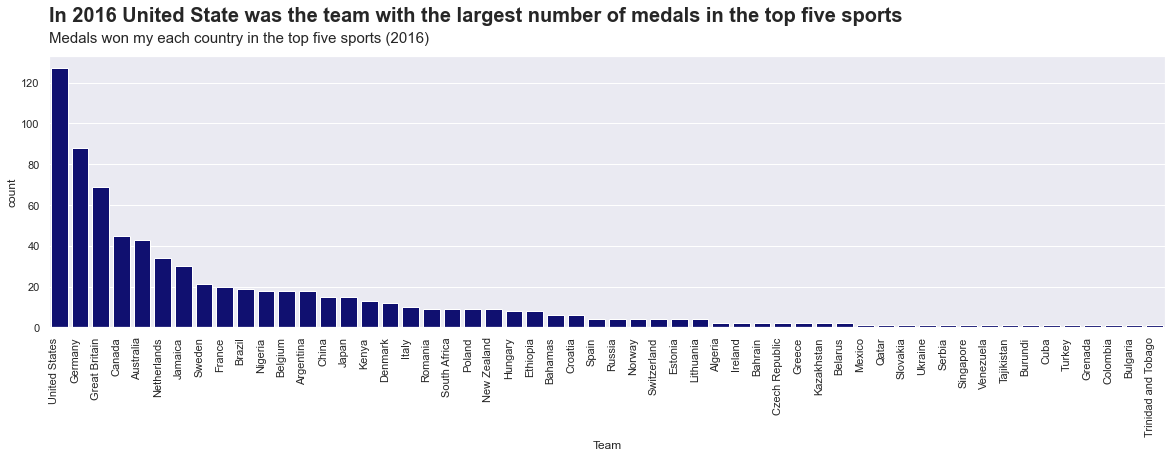

In [45]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data =top5_sport_medal_2016, x='Team',
                   order = top5_sport_medal_2016['Team'].value_counts().index,color = '#000080')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.text(-0.5,150,'In 2016 United State was the team with the largest number of medals in the top five sports',size =20,weight='bold')
ax.text(-0.5,140,'Medals won my each country in the top five sports (2016)',size =15)

In [46]:
top5_team = ['United States','Germany','Great Britain','Canada','Australia']
only_top5_team = top5_sport_medal_2016[top5_sport_medal_2016['Team'].isin(top5_team)]


Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.

C:\Users\Warin\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(12.084999999999994, 0.5, '')

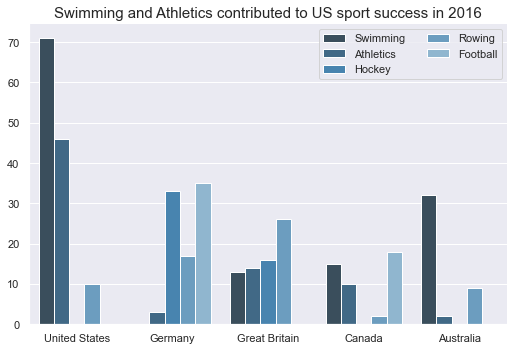

In [47]:
blue_d = sns.color_palette("Blues_d",n_colors=5)
blue_d.reverse()
sns.catplot('Team', data = only_top5_team, aspect = 1.5, kind = 'count',hue ='Sport',order = top5_team,palette= blue_d,legend=None)
plt.title('Swimming and Athletics contributed to US sport success in 2016',fontsize =15)
plt.legend(loc = 'upper right',ncol=2)
plt.xlabel('')
plt.ylabel('')

### 5.Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.
Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [48]:
top5_sport_medal_2016.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    3
Weight    5
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

There are missing values in weight column

Text(0, 0.5, '')

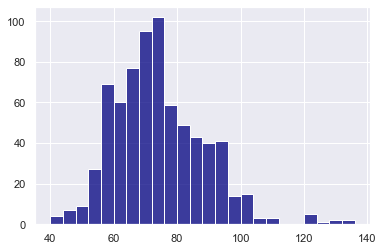

In [49]:
sns.histplot(top5_sport_medal_2016['Weight'],color='Navy')
plt.xlabel('')
plt.ylabel('')

Weight distribution is normal so we can fill those missing values with column's mean

In [50]:
weight_mean = top5_sport_medal_2016['Weight'].mean()
top5_sport_medal_2016['Weight'] = top5_sport_medal_2016['Weight'].fillna(weight_mean)
top5_sport_medal_2016['Weight'].isnull().sum()

C:\Users\Warin\AppData\Local\Temp/ipykernel_8436/2044220343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_sport_medal_2016['Weight'] = top5_sport_medal_2016['Weight'].fillna(weight_mean)


0

Text(0.5, 1.0, "Male's average weight is around 80 and female's is around 65")

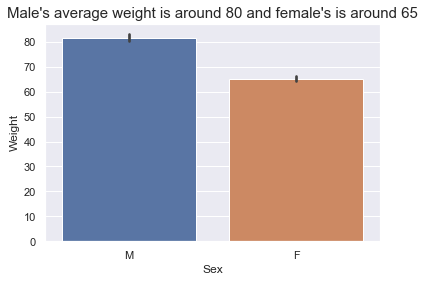

In [51]:
sns.barplot(x='Sex',y='Weight',data = top5_sport_medal_2016,estimator=np.mean)
plt.title("Male's average weight is around 80 and female's is around 65",fontsize=15)

Text(0.5, 1.0, "Rowing winners' average weight is the highest among other sports")

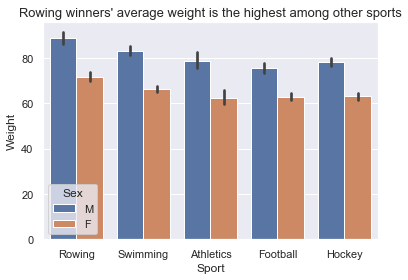

In [52]:
sns.barplot(x='Sport',y='Weight',data = top5_sport_medal_2016,estimator=np.mean,hue='Sex')
plt.title("Rowing winners' average weight is the highest among other sports",fontsize=13)